# Blood transfusion service center

V1: Recency - months since last donation <br>
V2: Frequency - total number of donation <br>
V3: Monetary - total blood donated in c.c. <br>
V4: Time - months since first donation), and a binary variable representing whether he/she donated blood in  March 2007 (1 stand for donating blood; 0 stands for not donating blood).

The target attribute is a binary variable representing whether <br>
he/she donated blood in March 2007 (2 stands for donating blood; 1 stands for not donating blood).

### The dataset is taken from https://www.openml.org/d/1464

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.utils import resample

from google.colab import files
uploaded = files.upload()
import io

Saving blood-transfusion-service-center.csv to blood-transfusion-service-center.csv


In [9]:

df = pd.read_csv(io.BytesIO(uploaded['blood-transfusion-service-center.csv']))
df.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In this dataframe, we can see that the last column correspond to the target to be predicted called "Class". We will create two variables, data and target to separate the data from which we could learn a predictive model and the target that should be predicted.

In [ ]:
df.shape

(748, 5)

In [12]:
data = df.drop(columns="Class")
target = df["Class"]

In [18]:
datanew = data.rename(columns={"V1":"Recency","V2":"Frequency","V3":"Monetary","V4":"Time"})

In [20]:
datanew.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


We observe four columns. Each record corresponds to a person that intended to give blood. The information stored in each column are:

* Recency: the time in months since the last time a person intended to give blood;
* Frequency: the number of time a person intended to give blood in the past;
* Monetary: the amount of blood given in the past (in c.c.);
* Time: the time in months since the first time a person intended to give blood.

Now, let's have a look regarding the type of data that we are dealing in these columns and if any missing values are present in our dataset.

In [21]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


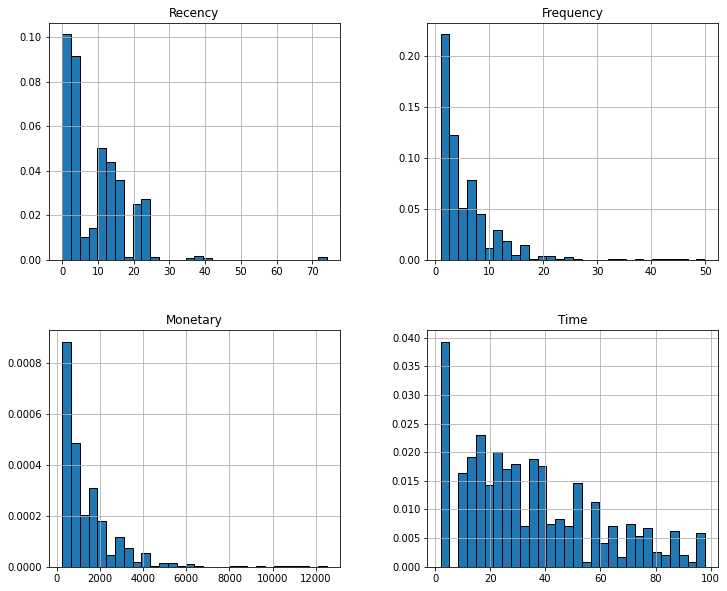

In [22]:
_ = datanew.hist(figsize=(12, 10), bins=30, edgecolor="black", density=True)

There is nothing shocking regarding the distributions. We only observe a high value range for the features "Recency", "Frequency", and "Monetary". It means that we have a few extreme high values for these features.

Now, let's have a look at the target so that we would like to predict for this task.

In [23]:
target.head()

0    2
1    2
2    2
3    2
4    1
Name: Class, dtype: int64

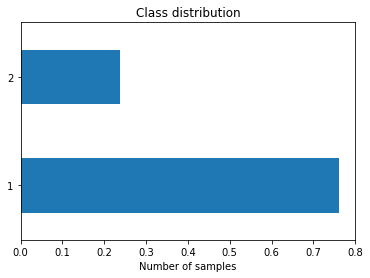

In [24]:
import matplotlib.pyplot as plt

target.value_counts(normalize=True).plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Class distribution")

We see that the target is discrete and contains two categories: whether a person "donated" or "not donated" his/her blood. Thus the task to be solved is a classification problem. We should note that the class counts of these two classes is different.

In [25]:
target.value_counts(normalize=True)

1    0.762032
2    0.237968
Name: Class, dtype: float64

Indeed, ~76% of the samples belong to the class `"not donated"`. It is rather
important: a classifier that would predict always this `"not donated"` class
would achieve an accuracy of 76% of good classification without using any
information from the data itself. This issue is known as class imbalance. One
should take care about the statistical performance metric used to evaluate a
model as well as the predictive model chosen itself.

Now, let's have a naive analysis to see if there is a link between features
and the target using a pair plot representation.

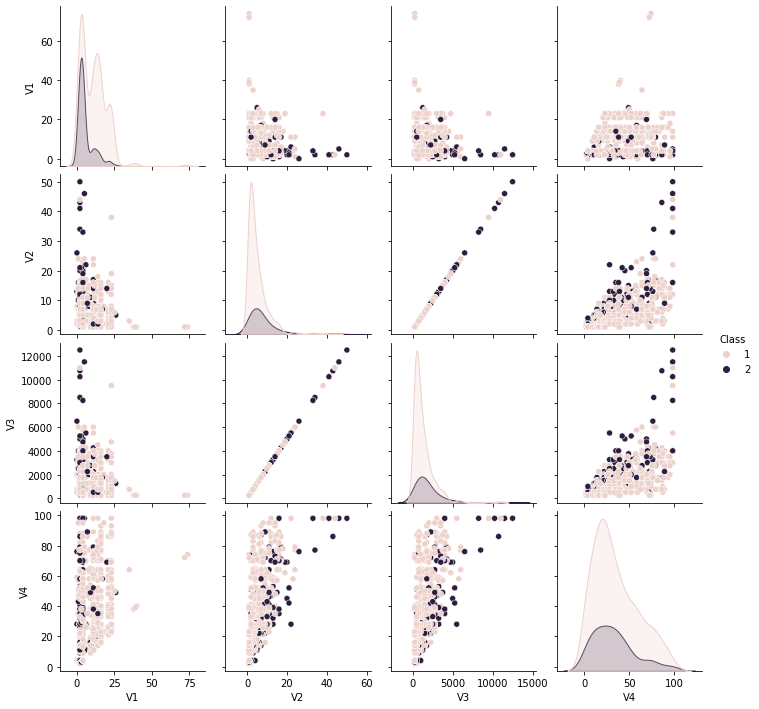

In [31]:
import seaborn as sns

_ = sns.pairplot(df, hue="Class")

Looking at the diagonal plots, we don't see any feature that individually could help at separating the two classes. When looking at a pair of feature, we don't see any stricking combinations as well. However, we can note that the "Monetary"(V3) and "Frequency"(V2) features are perfectly correlated: all the data points are aligned on a diagonal.

As a conclusion, this dataset would be a challenging dataset: it suffer from class imbalance, correlated features and thus very few features will be available to learn a model, and none of the feature combinations were found to help at predicting.